# Mini Dollar Strategy - Data Analysis and Technical Indicators

This notebook demonstrates:
1. Loading market data
2. Exploratory data analysis
3. Technical indicators calculation
4. Pattern visualization

In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from src.data.loaders.market_data import MarketDataLoader
from src.analysis.technical.strategy import TechnicalStrategy

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 6]
sns.set_palette('Set2')

## 1. Load and Prepare Market Data

In [7]:
# Initialize loader with explicit database path
loader = MarketDataLoader(db_path="../src/data/database/candles.db")

# Load last 6 months of data
end_date = datetime.now()
start_date = end_date - timedelta(days=180)

# Carregando dados com intervalo de 5 minutos
data = loader.get_minute_data(
    interval=5,  # intervalo de 5 minutos
    start_date=start_date.strftime('%Y-%m-%d'),
    end_date=end_date.strftime('%Y-%m-%d')
)

print(f"Loaded {len(data)} candles")
data.head()

Loaded 13783 candles


c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:88: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['open'] = df['open'].resample(rule).first()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:89: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['high'] = df['high'].resample(rule).max()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:90: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['low'] = df['low'].resample(rule).min()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:91: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['close'] = df['clo

,open,high,low,close,volume
time,,,,,
2024-06-07 09:00:00,5378.261,5380.304,5372.643,5374.175,48438
2024-06-07 09:05:00,5374.686,5375.197,5367.536,5369.068,35648
2024-06-07 09:10:00,5368.557,5372.643,5368.047,5369.068,27432
2024-06-07 09:15:00,5369.579,5373.665,5368.557,5372.132,20180
2024-06-07 09:20:00,5372.643,5373.665,5370.090,5372.132,18400


### Data Quality Analysis

In [8]:
def analyze_data_quality(df):
    """Analyze data quality and print report."""
    print("Data Quality Report:\n")
    
    # Basic information
    print("1. Basic Information:")
    print(f"Total records: {len(df)}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")
    print(f"Columns: {', '.join(df.columns)}\n")
    
    # Missing values
    print("2. Missing Values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found\n")
    
    # Data statistics
    print("3. Data Statistics:")
    print(df.describe())

# Run analysis
analyze_data_quality(data)

Data Quality Report:

1. Basic Information:
Total records: 13783
Date range: 2024-06-07 09:00:00 to 2024-11-29 18:25:00
Columns: open, high, low, close, volume

2. Missing Values:
No missing values found

3. Data Statistics:
               open          high           low         close         volume
count  13783.000000  13783.000000  13783.000000  13783.000000   13783.000000
mean    5661.354089   5664.473492   5658.328127   5661.400201   27380.701516
std      121.430872    121.769449    121.117294    121.407678   22291.916914
min     5368.557000   5372.643000   5363.961000   5369.068000     775.000000
25%     5558.723000   5561.316000   5555.679000   5558.723000   10915.000000
50%     5658.818000   5662.070000   5656.119000   5658.818000   20671.000000
75%     5745.632000   5748.559000   5742.612000   5745.632000   38342.000000
max     6126.500000   6138.000000   6119.000000   6126.500000  217927.000000


## 2. Calculate Technical Indicators

In [9]:
# Initialize strategy
strategy = TechnicalStrategy()

# Calculate indicators
analysis = strategy.calculate_indicators(data)

# Show available indicators
print("Available indicators:")
indicators = [col for col in analysis.columns if col not in ['open', 'high', 'low', 'close', 'volume']]
print(indicators)
analysis.head()

2024-12-04 09:05:43.319 | INFO     | src.analysis.technical.strategy:__init__:25 - Initialized TechnicalStrategy with RSI=14, MA_Fast=9, MA_Slow=21
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\analysis\technical\strategy.py:81: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
2024-12-04 09:05:43.344 | INFO     | src.analysis.technical.strategy:calculate_indicators:83 - Calculated technical indicators


Available indicators:
['rsi', 'ma_fast', 'ma_slow', 'macd', 'macd_signal', 'macd_hist', 'bb_middle', 'bb_upper', 'bb_lower']


,open,high,low,close,volume,rsi,ma_fast,ma_slow,macd,macd_signal,macd_hist,bb_middle,bb_upper,bb_lower
time,,,,,,,,,,,,,,
2024-06-07 09:00:00,5378.261,5380.304,5372.643,5374.175,48438,50.0,5382.516667,5397.035476,0.000000,0.000000,0.000000,5396.7996,5433.304198,5360.295002
2024-06-07 09:05:00,5374.686,5375.197,5367.536,5369.068,35648,50.0,5382.516667,5397.035476,-0.407396,-0.081479,-0.325917,5396.7996,5433.304198,5360.295002
2024-06-07 09:10:00,5368.557,5372.643,5368.047,5369.068,27432,50.0,5382.516667,5397.035476,-0.721938,-0.209571,-0.512367,5396.7996,5433.304198,5360.295002
2024-06-07 09:15:00,5369.579,5373.665,5368.557,5372.132,20180,50.0,5382.516667,5397.035476,-0.715726,-0.310802,-0.404924,5396.7996,5433.304198,5360.295002
2024-06-07 09:20:00,5372.643,5373.665,5370.090,5372.132,18400,50.0,5382.516667,5397.035476,-0.702702,-0.389182,-0.313520,5396.7996,5433.304198,5360.295002


## 3. Visualize Price Action and Indicators

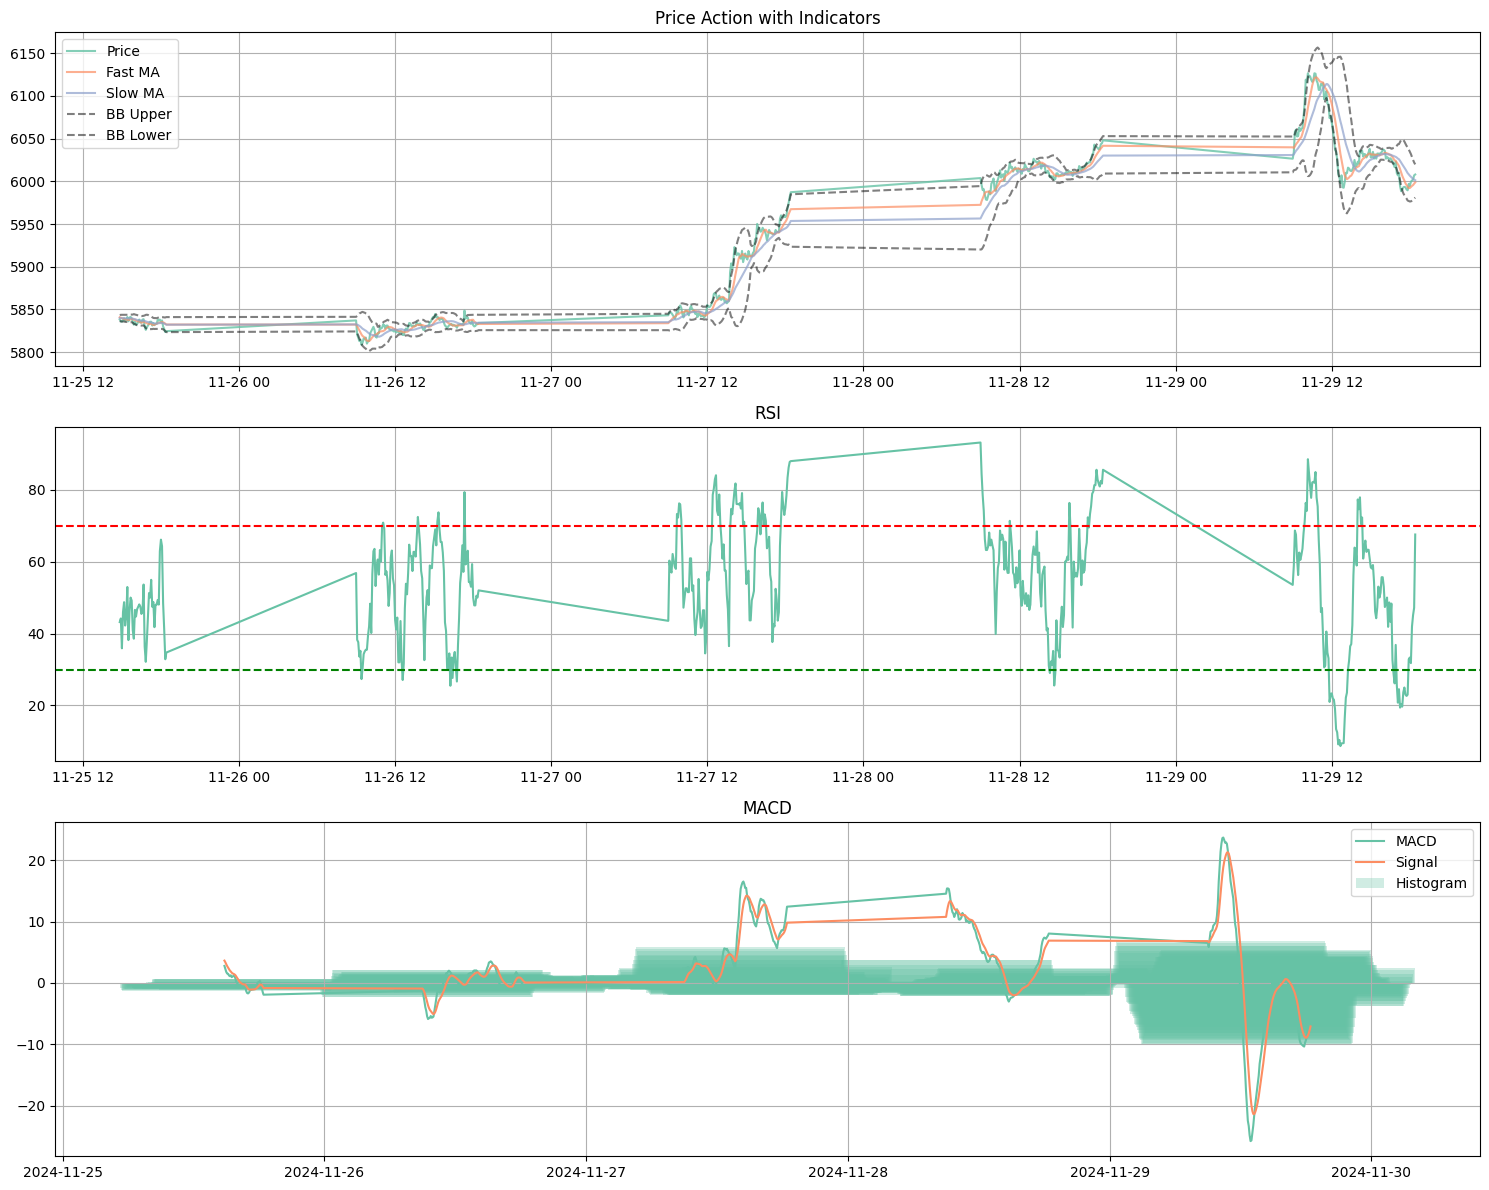

In [10]:
def plot_price_and_indicators(df, window=500):
    """Plot comprehensive price and indicator analysis."""
    recent = df.tail(window)
    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 12))
    
    # 1. Price and Moving Averages
    ax1 = plt.subplot(3, 1, 1)
    ax1.plot(recent.index, recent['close'], label='Price', alpha=0.8)
    ax1.plot(recent.index, recent['ma_fast'], label='Fast MA', alpha=0.7)
    ax1.plot(recent.index, recent['ma_slow'], label='Slow MA', alpha=0.7)
    ax1.plot(recent.index, recent['bb_upper'], 'k--', label='BB Upper', alpha=0.5)
    ax1.plot(recent.index, recent['bb_lower'], 'k--', label='BB Lower', alpha=0.5)
    ax1.set_title('Price Action with Indicators')
    ax1.legend()
    ax1.grid(True)
    
    # 2. RSI
    ax2 = plt.subplot(3, 1, 2)
    ax2.plot(recent.index, recent['rsi'])
    ax2.axhline(y=70, color='r', linestyle='--')
    ax2.axhline(y=30, color='g', linestyle='--')
    ax2.set_title('RSI')
    ax2.grid(True)
    
    # 3. MACD
    ax3 = plt.subplot(3, 1, 3)
    ax3.plot(recent.index, recent['macd'], label='MACD')
    ax3.plot(recent.index, recent['macd_signal'], label='Signal')
    ax3.bar(recent.index, recent['macd_hist'], alpha=0.3, label='Histogram')
    ax3.set_title('MACD')
    ax3.legend()
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot analysis
plot_price_and_indicators(analysis)

## 4. Analyze Potential Trading Signals

2024-12-04 09:06:19.554 | INFO     | src.analysis.technical.strategy:generate_signals:111 - Generated trading signals


Signal Distribution:
Buy signals (1): 13
Sell signals (-1): 14
Neutral (0): 13756

Signal Transitions:
final_signal
 0.0    13732
 1.0       25
-1.0       25
Name: count, dtype: int64


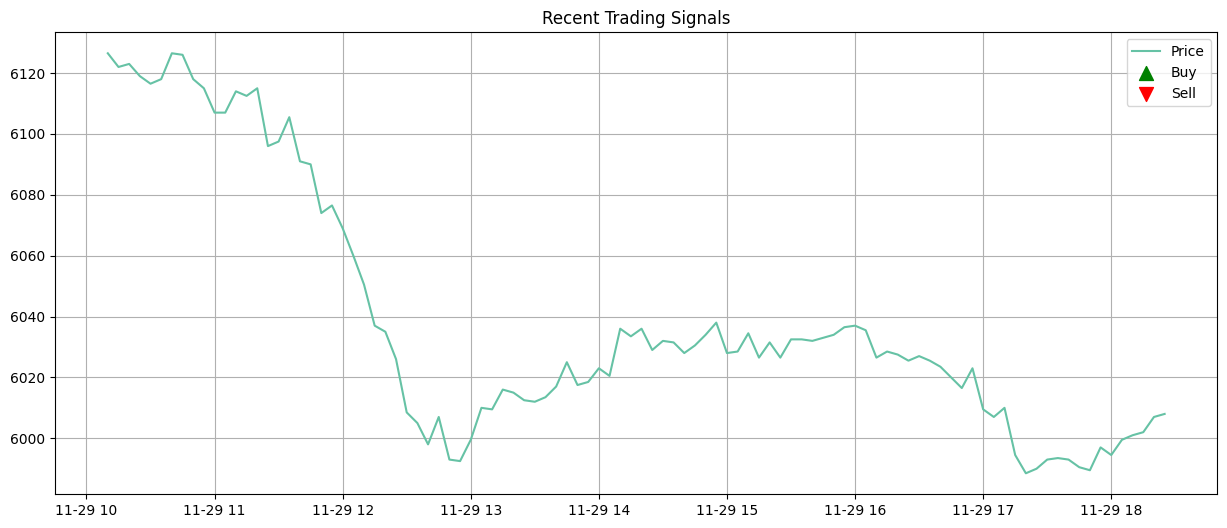

In [11]:
# Generate trading signals
signals = strategy.generate_signals(analysis)

def analyze_trading_signals(df):
    """Analyze generated trading signals."""
    # Count signals
    signal_counts = df['final_signal'].value_counts()
    print("Signal Distribution:")
    print(f"Buy signals (1): {signal_counts.get(1, 0)}")
    print(f"Sell signals (-1): {signal_counts.get(-1, 0)}")
    print(f"Neutral (0): {signal_counts.get(0, 0)}\n")
    
    # Signal transitions
    transitions = df['final_signal'].diff().value_counts()
    print("Signal Transitions:")
    print(transitions)

# Analyze signals
analyze_trading_signals(signals)

# Plot recent signals
recent = signals.tail(100)
plt.figure(figsize=(15, 6))
plt.plot(recent.index, recent['close'], label='Price')
plt.scatter(recent[recent['final_signal'] == 1].index, \
            recent[recent['final_signal'] == 1]['close'],
            marker='^', c='g', s=100, label='Buy')
plt.scatter(recent[recent['final_signal'] == -1].index,
            recent[recent['final_signal'] == -1]['close'],
            marker='v', c='r', s=100, label='Sell')
plt.title('Recent Trading Signals')
plt.legend()
plt.grid(True)
plt.show()